In [1]:
%matplotlib inline
from matplotlib import pylab as plt
from datetime import datetime
import subprocess
import numpy as np

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
p = subprocess.Popen(['git', 'log', '--numstat'], 
                     stdout=subprocess.PIPE, 
                     stderr=subprocess.PIPE)                                 
out, err = p.communicate()

dates = []
added = []
deleted = []

for line in out.splitlines():
    if line.split(':   ')[0] == "Date":        
        # Parse day
        date_str = line.split(':   ')[1]
        day = datetime.strptime(date_str, '%a %b %d %H:%M:%S %Y +%f').strftime('%a %b %d %Y')
        
        # if first or new day, add new position to the array
        if len(dates)==0:
            print day
            dates.append(day)
            added.append(0)
            deleted.append(0)
            
        elif day != dates[-1]:
            print day
            dates.append(day)
            added.append(0)
            deleted.append(0)
            
    # Count addition and deletions for the current day
    if ".tex" in line:
        print line.split('\t')
        added[-1] += int(line.split('\t')[0])
        deleted[-1] += int(line.split('\t')[1])
        fname = line.split('\t')[2]

added = added[::-1]
deleted = deleted[1::-1]
dates = dates[::-1]

Sun Feb 07 2016
['33', '49', 'chapters/2_soa/soa.tex']
Sat Feb 06 2016
['54', '21', 'chapters/2_soa/soa.tex']
Thu Dec 24 2015
['5', '2', 'chapters/2_soa/soa.tex']
Wed Dec 23 2015
['64', '2', 'chapters/2_soa/soa.tex']
['34', '2', 'chapters/2_soa/soa.tex']
Tue Dec 22 2015
['10', '4', 'chapters/2_soa/soa.tex']
Mon Dec 21 2015
['9', '1', 'chapters/2_soa/soa.tex']
Sun Dec 20 2015
['17', '2', 'chapters/2_soa/soa.tex']
Thu Dec 10 2015
['18', '1', 'chapters/2_soa/soa.tex']
['5', '4', 'chapters/3_dualview_clustering/dualview_clustering.tex']
['7', '4', 'chapters/main/main.tex']
Sun Dec 06 2015
['8', '1115', 'chapters/2_soa/soa.tex']
['81', '0', 'chapters/1_intro/intro.tex']
['1127', '0', 'chapters/2_soa/soa.tex']
['1127', '0', 'chapters/3_dualview_clustering/dualview_clustering.tex']
['98', '0', 'chapters/bayes/bayes.tex']
['194', '0', 'chapters/clustering_threads/clustering_threads.tex']
['136', '0', 'chapters/main/main.tex']
['7', '0', 'chapters/prediction_death/prediction_death.tex']
['403',

In [3]:
np.cumsum(added)

array([3474, 3504, 3521, 3530, 3540, 3638, 3643, 3697, 3730])

In [4]:
ideal = np.arange(1,len(dates)+1)*10

In [5]:
for i, date in enumerate(dates):
    dates[i] = datetime.strptime(date, '%a %b %d %Y')

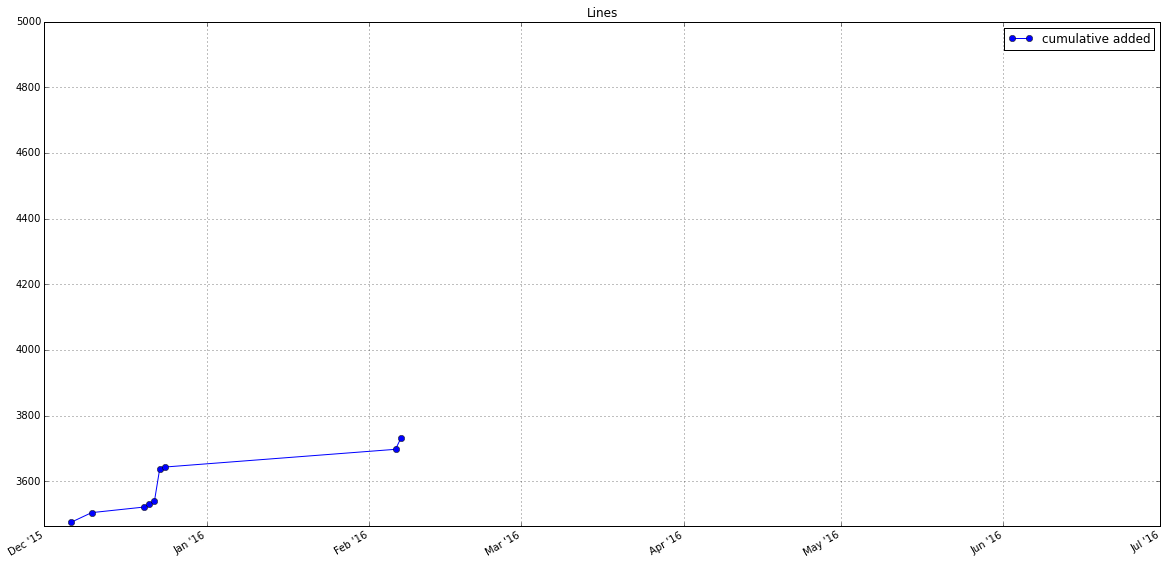

In [7]:
from matplotlib.dates import MonthLocator, DayLocator, WeekdayLocator, DateFormatter
import datetime

fig = plt.figure(figsize=(20,10)) 
ax = plt.gca()

months = MonthLocator()
days = DayLocator()
monthsFmt = DateFormatter("%b '%y")

ax.xaxis.set_major_locator(months)
#ax.xaxis.set_minor_locator(days)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_formatter(DateFormatter('%d'))


#ax.plot_date(dates, added, 'o-', label="added")
ax.plot_date(dates, np.cumsum(added), 'o-', label="cumulative added")
#ax.plot_date(dates, deleted, 'o-', label="deleted")
#ax.plot_date(dates, ideal, 'o-', label="ideal")
ax.set_ylim(added[0]-10,5000)
ax.legend(loc=1)
ax.autoscale_view()
ax.grid(True)

fig.autofmt_xdate()
ax.set_xlim([datetime.date(2015, 12, 1), datetime.date(2016, 7, 1)])
plt.title("Lines")
plt.show()

In [19]:
min(added)

5

In [21]:
min(added, 10)

10

In [10]:
deleted

[1115, 9]